In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# We iterate through the coordinates, Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list. We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. 
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list. We create the for loop with the enumerate() method and reference the index and the city in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes. In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city. Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city. Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count. Then we add one to the record count before the next city is processed.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Create endpoint URL with each city.
city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | pozo colorado
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | taoudenni
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | blackwater
Processing Record 10 of Set 1 | lavrentiya
Processing Record 11 of Set 1 | yanam
Processing Record 12 of Set 1 | clovis
Processing Record 13 of Set 1 | sinegorye
Processing Record 14 of Set 1 | cantagallo
Processing Record 15 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 1 | buraydah
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | karwar
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | hobyo
Processing Record 22 of Set 1 | castro
Processing R

Processing Record 34 of Set 4 | saint george
Processing Record 35 of Set 4 | thompson
Processing Record 36 of Set 4 | telimele
Processing Record 37 of Set 4 | kaeo
Processing Record 38 of Set 4 | valparaiso
Processing Record 39 of Set 4 | mirpur sakro
Processing Record 40 of Set 4 | berdigestyakh
Processing Record 41 of Set 4 | andilamena
Processing Record 42 of Set 4 | maldonado
Processing Record 43 of Set 4 | casino
Processing Record 44 of Set 4 | baykit
Processing Record 45 of Set 4 | evensk
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | horadiz
Processing Record 48 of Set 4 | dera ghazi khan
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | boa vista
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | kapaa
Processing Record 3 of Set 5 | nova serrana
Processing Record 4 of Set 5 | senanga
Processing Record 5 of Set 5 | abu kamal
Processing Record 6 of Set 5 | deh rawud
City not found. Skipping...
Process

Processing Record 22 of Set 8 | hinesville
Processing Record 23 of Set 8 | san carlos de bariloche
Processing Record 24 of Set 8 | bosaso
Processing Record 25 of Set 8 | salisbury
Processing Record 26 of Set 8 | maragogi
Processing Record 27 of Set 8 | orlik
Processing Record 28 of Set 8 | namatanai
Processing Record 29 of Set 8 | taua
Processing Record 30 of Set 8 | mujiayingzi
Processing Record 31 of Set 8 | hajdusamson
Processing Record 32 of Set 8 | visavadar
Processing Record 33 of Set 8 | turayf
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | dahanu
Processing Record 36 of Set 8 | kaduqli
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | vardo
Processing Record 39 of Set 8 | kirkkonummi
Processing Record 40 of Set 8 | ahipara
Processing Record 41 of Set 8 | hofn
Processing Record 42 of Set 8 | bengkulu
Processing Record 43 of Set 8 | kyzyl-suu
Processing Record 44 of Set 8 | lillooet
Processing Record 45 of Set 8 | fort saint joh

Processing Record 11 of Set 12 | ciudad bolivar
Processing Record 12 of Set 12 | sayyan
Processing Record 13 of Set 12 | sorong
Processing Record 14 of Set 12 | janauba
Processing Record 15 of Set 12 | moshupa
Processing Record 16 of Set 12 | urumqi
Processing Record 17 of Set 12 | san cristobal
Processing Record 18 of Set 12 | howard springs
Processing Record 19 of Set 12 | kruisfontein
Processing Record 20 of Set 12 | acuna
City not found. Skipping...
Processing Record 21 of Set 12 | itupiranga
Processing Record 22 of Set 12 | berlevag
Processing Record 23 of Set 12 | tual
Processing Record 24 of Set 12 | cardston
Processing Record 25 of Set 12 | umm lajj
Processing Record 26 of Set 12 | narrabri
Processing Record 27 of Set 12 | calceta
Processing Record 28 of Set 12 | norman wells
Processing Record 29 of Set 12 | sydney
Processing Record 30 of Set 12 | udachnyy
Processing Record 31 of Set 12 | syriam
Processing Record 32 of Set 12 | sangar
Processing Record 33 of Set 12 | mount gamb

In [8]:
len(city_data)

588

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Pierre,-21.3393,55.4781,85.64,78,75,21.85,RE,2022-02-01 14:10:43
1,Busselton,-33.6500,115.3333,64.04,47,0,19.80,AU,2022-02-01 14:10:44
2,Atuona,-9.8000,-139.0333,78.21,74,20,22.77,PF,2022-02-01 14:10:44
3,Pozo Colorado,-23.4923,-58.7972,98.51,20,0,5.35,PY,2022-02-01 14:10:44
4,Laguna,38.4210,-121.4238,49.33,56,0,5.99,US,2022-02-01 14:10:45
5,Rikitea,-23.1203,-134.9692,77.74,68,46,7.38,PF,2022-02-01 14:09:59
6,Taoudenni,22.6783,-3.9836,84.00,10,30,15.08,ML,2022-02-01 14:10:45
7,Mataura,-46.1927,168.8643,59.49,97,36,3.94,NZ,2022-02-01 14:10:45
8,Blackwater,-23.5833,148.8833,80.44,61,100,8.59,AU,2022-02-01 14:10:46
9,Lavrentiya,65.5833,-171.0000,5.70,66,7,20.49,RU,2022-02-01 14:10:46


In [10]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Pierre,RE,2022-02-01 14:10:43,-21.3393,55.4781,85.64,78,75,21.85
1,Busselton,AU,2022-02-01 14:10:44,-33.6500,115.3333,64.04,47,0,19.80
2,Atuona,PF,2022-02-01 14:10:44,-9.8000,-139.0333,78.21,74,20,22.77
3,Pozo Colorado,PY,2022-02-01 14:10:44,-23.4923,-58.7972,98.51,20,0,5.35
4,Laguna,US,2022-02-01 14:10:45,38.4210,-121.4238,49.33,56,0,5.99
5,Rikitea,PF,2022-02-01 14:09:59,-23.1203,-134.9692,77.74,68,46,7.38
6,Taoudenni,ML,2022-02-01 14:10:45,22.6783,-3.9836,84.00,10,30,15.08
7,Mataura,NZ,2022-02-01 14:10:45,-46.1927,168.8643,59.49,97,36,3.94
8,Blackwater,AU,2022-02-01 14:10:46,-23.5833,148.8833,80.44,61,100,8.59
9,Lavrentiya,RU,2022-02-01 14:10:46,65.5833,-171.0000,5.70,66,7,20.49


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
new_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

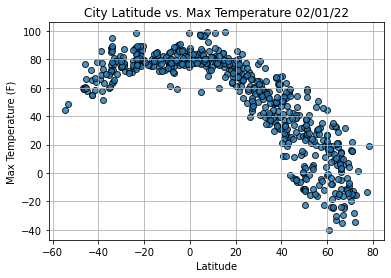

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

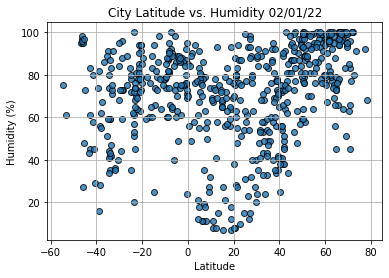

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

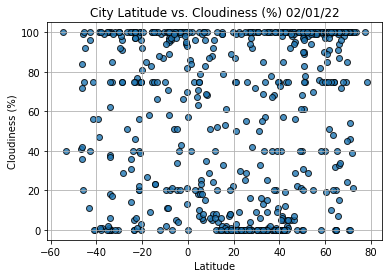

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

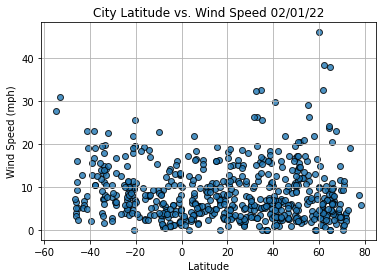

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()